Github: [dsci-100-project](https://github.com/wizexplorer/dsci-100-project)

In [1]:
# Load required packages
library(tidyverse)
library(repr)
library(tidymodels)

# set seed for reproducability
set.seed(0)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# Load the data
players <- read_csv("https://raw.githubusercontent.com/wizexplorer/dsci-100-project/main/data/players.csv")
sessions <- read_csv("https://raw.githubusercontent.com/wizexplorer/dsci-100-project/main/data/sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# Preview data shape, variables...
head(players)
dim(players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] 196   7

## Players dataset
The players dataset contains 196 observations of players with 7 attributes:  
  - `experience` (character): Self-reported experience level of the player
  - `subscribe`(logical): Whether player subscribed to the newsletter
  - `hashedEmail` (character): Hashed unique player identifier
  - `played_hours` (double): Total number of hours played by the player
  - `name` (character): Player's chosen in-game name
  - `gender` (character): Player's gender
  - `Age` (double): Player's age in years

At first we see that the data is tidy, but to make it usable for our purposes (classification), we will need to convert the character types to categorical variables (factor):

In [4]:
players <- players |>
  mutate(
    subscribe = as.factor(subscribe),
    experience = as.factor(experience),
    gender = as.factor(gender)
  )
glimpse(players)

Rows: 196
Columns: 7
$ experience   <fct> Pro, Veteran, Veteran, Amateur, Regular, Amateur, Regular…
$ subscribe    <fct> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <fct> Male, Male, Male, Female, Male, Female, Female, Male, Mal…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


We compute summary statistics on this new dataset:

In [5]:
players_summary <- players |>
  summarise(
    mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2),
    mean_age = round(mean(Age, na.rm = TRUE), 2),
    n_missing_age = sum(is.na(Age)),
    n_missing_played_hours = sum(is.na(played_hours))
  )

players_summary

mean_played_hours,mean_age,n_missing_age,n_missing_played_hours
<dbl>,<dbl>,<int>,<int>
5.85,21.14,2,0


According to our calculations:
- The average hours played is `5.85` hours.
- The average player is `21.14` years old.

We also found that there are 2 undefined observations for `Age` (maybe these individual skipped this question) which isn't too large. 

This is a good result for us because we could have run into the issue of not having enough usable data from the dataset for training our model had there been too much missing data.

Moving onto the sessions dataset...

In [6]:
head(sessions)
dim(sessions)

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


[1] 1535    5

## Sessions dataset
The sessions dataset contains 1535 observations of players' sessions with 5 attributes:  
  - `hashedEmail` (character): Hashed unique player identifier
  - `start_time` (character): Human-readable session start time (format: DD/MM/YYYY HH:MM)
  - `end_time` (character): Human-readable session end time (format: DD/MM/YYYY HH:MM)
  - `original_start_time` (double): Session start time as Unix timestamp (milliseconds)
  - `original_end_time` (double): Session end time as Unix timestamp (milliseconds)

This data is almost tidy! Although, `start_time` and `end_time` could be separated into two variables each, we choose not to do so in this case, because we already have a combined (absolute) version for the times which we can use instead of these variables. Instead, we convert them into datetime objects to compute statistics on the dataset. Also, these variables may be helpful to convert the ineligible Unix time into legible human understandable time later.

In [7]:
sessions <- sessions |>
  mutate(
    start_time = dmy_hm(start_time),
    end_time = dmy_hm(end_time)
  )
glimpse(sessions)

Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <dttm> 2024-06-30 18:12:00, 2024-06-17 23:33:00, 2024-07…
$ end_time            <dttm> 2024-06-30 18:24:00, 2024-06-17 23:46:00, 2024-07…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…


For summary statistic, we first add a new variable `session_duration_mins` to our dataset that stores the session duration (in minutes) of each player login:

In [8]:
sessions <- sessions |>
  mutate(session_duration_mins = as.numeric(difftime(end_time, start_time, units = "mins")))
glimpse(sessions)

Rows: 1,535
Columns: 6
$ hashedEmail           <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d…
$ start_time            <dttm> 2024-06-30 18:12:00, 2024-06-17 23:33:00, 2024-…
$ end_time              <dttm> 2024-06-30 18:24:00, 2024-06-17 23:46:00, 2024-…
$ original_start_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+…
$ original_end_time     <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+…
$ session_duration_mins <dbl> 12, 13, 23, 36, 11, 122, 9, 17, 18, 39, 4, 28, 4…


Now we compute summary statistics on this new dataset:

In [9]:
sessions_summary <- sessions |>
  summarise(
    avg_duration = round(mean(session_duration_mins, na.rm = TRUE), 2),
    max_duration = round(max(session_duration_mins, na.rm = TRUE), 2),
    min_duration = round(min(session_duration_mins, na.rm = TRUE), 2),
    num_sessions = n()
  )
sessions_summary

avg_duration,max_duration,min_duration,num_sessions
<dbl>,<dbl>,<dbl>,<int>
50.86,259,3,1535


According to our calculations:
- The maximum duration of sessions was `259` minutes.
- The average duration of sessions was `50.86` minutes.
- The minimum duration of sessions was `3` minutes.
- There were a total of `1535` sessions throughout the study.

### Broad Question:
 What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter?
### Specific Question:
 Can we accurately predict whether a player subscribes to the game-related newsletter based on their characteristics and in-game behavior?
 Accuracy metric will not be very useful here because the response class is not balanced.. "TRUE" observations outnumber the "FALSE" once by 3 times. Hence, we will focus on improving the recall of the model as we believe missing out on potential subscribers (recall) is more costly than targeting uninterested players (precision).

 We aim to model the `subscribe` variable using features such as `Age`, `experience`, `gender`, hours played (`played_hours`) and session information such as `mean_session_duration`, `total_session_duration` and `num_sessions` grouped by player.  
 These predictors will be evaluated and selected during cross-validation.  
 The response variable has been converted to a factor for classification.  
 
 We now join the two tibbles and aggregate the session level data to the player level:

In [10]:
session_by_player <- sessions |>
  group_by(hashedEmail) |>
  summarise(
    mean_session_duration = mean(session_duration_mins, na.rm = TRUE),
    total_session_duration = sum(session_duration_mins, na.rm = TRUE),
    num_sessions = n()
  )

data <- left_join(x=players, y=session_by_player, by = "hashedEmail")
glimpse(data)

missing_data <- data |>
  summarise(
    n_missing_age = sum(is.na(Age)),
    n_missing_played_hours = sum(is.na(played_hours)),
    n_missing_mean_session = sum(is.na(mean_session_duration)),
    n_missing_total_session = sum(is.na(total_session_duration)),
    n_missing_num_session = sum(is.na(num_sessions))
  )
missing_data

Rows: 196
Columns: 10
$ experience             <fct> Pro, Veteran, Veteran, Amateur, Regular, Amateu…
$ subscribe              <fct> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALS…
$ hashedEmail            <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6…
$ played_hours           <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0…
$ name                   <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie…
$ gender                 <fct> Male, Male, Male, Female, Male, Female, Female,…
$ Age                    <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, …
$ mean_session_duration  <dbl> 74.77778, 85.00000, 5.00000, 50.00000, 9.00000,…
$ total_session_duration <dbl> 2019, 255, 5, 50, 9, NA, NA, 5, 13, NA, 115, NA…
$ num_sessions           <int> 27, 3, 1, 1, 1, NA, NA, 1, 1, NA, 3, NA, 1, 1, …


n_missing_age,n_missing_played_hours,n_missing_mean_session,n_missing_total_session,n_missing_num_session
<int>,<int>,<int>,<int>,<int>
2,0,71,71,71


Notice, we have missing data for 71 players from the sessions dataset. Now, 71 observations are a considerable portion of our dataset so we cannot afford the k-nn model removing these rows during training. Consequently, we must somehow make the model include these rows.

We can do this in two ways:
- Impute missing values with either a `0` or `mean` of variable.
- Impute missing values with `0` and create a missing indicator variable to let the model learn if the absence of data carries a signal.

Since we already decided to choose predictive variables using cross validation, we will go with option 2. If the missing data doesn't correspond to a signal, it will automatically have a low accuracy and not be choosen as a pridictive variable.

In [11]:
data <- data |>
  mutate(
    # Create missing indicators (as factors for modeling)
    missing_mean_duration = as.factor(is.na(mean_session_duration)),
    missing_total_duration = as.factor(is.na(total_session_duration)),
    missing_num_sessions   = as.factor(is.na(num_sessions)),

    # Impute missing values with 0 (assumes no session activity)
    mean_session_duration  = replace_na(mean_session_duration, 0),
    total_session_duration = replace_na(total_session_duration, 0),
    num_sessions           = replace_na(num_sessions, 0)
  )
glimpse(data)

Rows: 196
Columns: 13
$ experience             <fct> Pro, Veteran, Veteran, Amateur, Regular, Amateu…
$ subscribe              <fct> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALS…
$ hashedEmail            <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6…
$ played_hours           <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0…
$ name                   <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie…
$ gender                 <fct> Male, Male, Male, Female, Male, Female, Female,…
$ Age                    <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, …
$ mean_session_duration  <dbl> 74.77778, 85.00000, 5.00000, 50.00000, 9.00000,…
$ total_session_duration <dbl> 2019, 255, 5, 50, 9, 0, 0, 5, 13, 0, 115, 0, 10…
$ num_sessions           <int> 27, 3, 1, 1, 1, 0, 0, 1, 1, 0, 3, 0, 1, 1, 0, 0…
$ missing_mean_duration  <fct> FALSE, FALSE, FALSE, FALSE, FALSE, TRUE, TRUE, …
$ missing_total_duration <fct> FALSE, FALSE, FALSE, FALSE, FALSE, TRUE, TRUE, …
$ missing_num_sess

Since we're already at this, we impute the 2 missing `Age` observations with its `mean` since this likely does not have a missing information and even if it does, 2 observations might not justify creating an additional column and likely won't affect our accuracy too much.

In [12]:
data <- data |>
  mutate(
    Age = if_else(
      is.na(Age),
      mean(Age, na.rm = TRUE),
      Age
    )
  )
glimpse(data)

Rows: 196
Columns: 13
$ experience             <fct> Pro, Veteran, Veteran, Amateur, Regular, Amateu…
$ subscribe              <fct> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALS…
$ hashedEmail            <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6…
$ played_hours           <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0…
$ name                   <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie…
$ gender                 <fct> Male, Male, Male, Female, Male, Female, Female,…
$ Age                    <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, …
$ mean_session_duration  <dbl> 74.77778, 85.00000, 5.00000, 50.00000, 9.00000,…
$ total_session_duration <dbl> 2019, 255, 5, 50, 9, 0, 0, 5, 13, 0, 115, 0, 10…
$ num_sessions           <int> 27, 3, 1, 1, 1, 0, 0, 1, 1, 0, 3, 0, 1, 1, 0, 0…
$ missing_mean_duration  <fct> FALSE, FALSE, FALSE, FALSE, FALSE, TRUE, TRUE, …
$ missing_total_duration <fct> FALSE, FALSE, FALSE, FALSE, FALSE, TRUE, TRUE, …
$ missing_num_sess

Check if we solved the missing variables' issue:

In [13]:
missing_data <- data |>
  summarise(
    n_missing_age = sum(is.na(Age)),
    n_missing_played_hours = sum(is.na(played_hours)),
    n_missing_mean_session = sum(is.na(mean_session_duration)),
    n_missing_total_session = sum(is.na(total_session_duration)),
    n_missing_num_session = sum(is.na(num_sessions))
  )
missing_data

n_missing_age,n_missing_played_hours,n_missing_mean_session,n_missing_total_session,n_missing_num_session
<int>,<int>,<int>,<int>,<int>
0,0,0,0,0


## Visualizations

In [14]:
options(repr.plot.width = 12, repr.plot.height = 7)

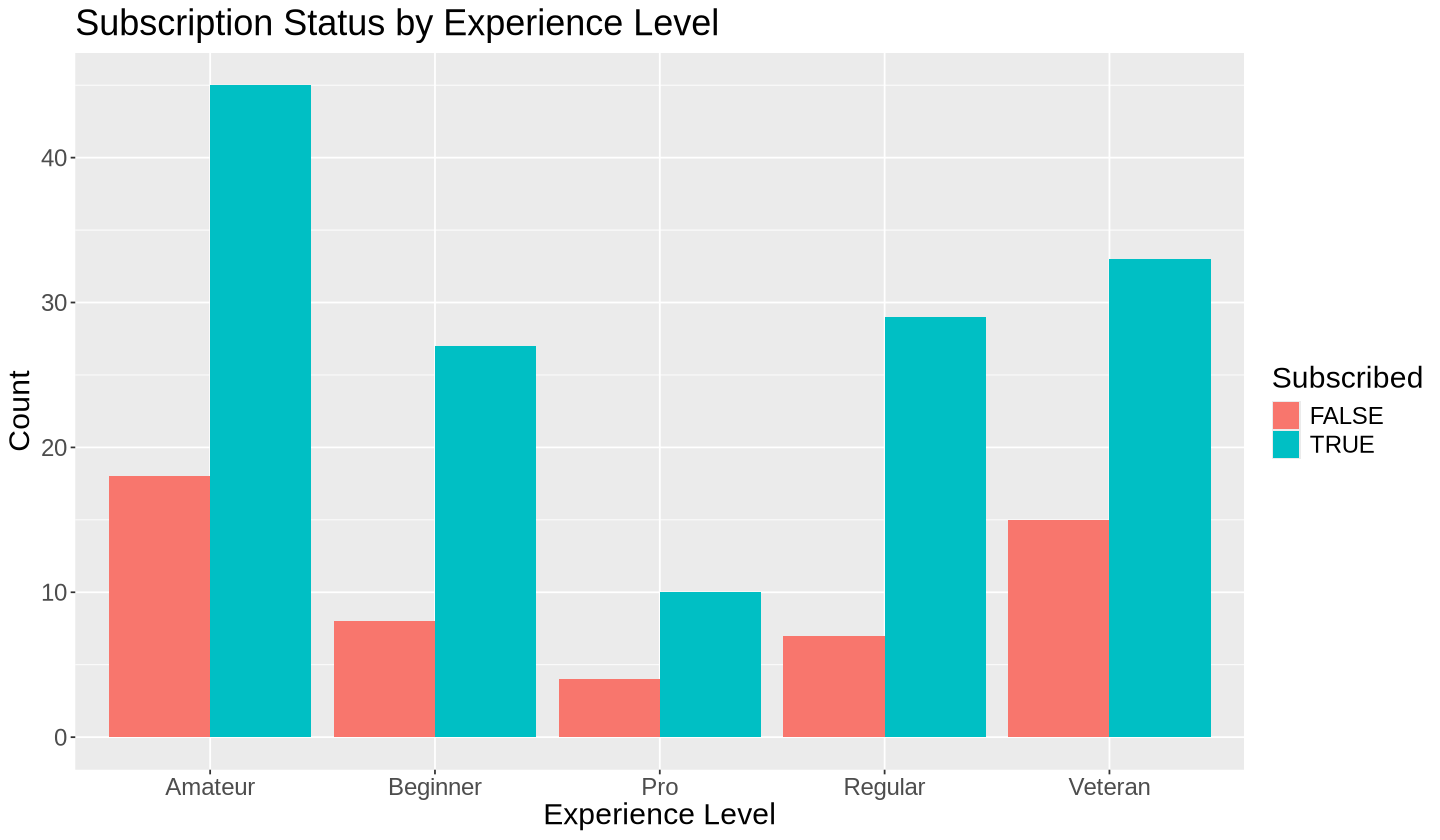

In [15]:
data |>
  ggplot(aes(x = experience, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Subscription Status by Experience Level",
    x = "Experience Level", y = "Count",
    fill = "Subscribed"
  ) +
  theme(text = element_text(size=18))

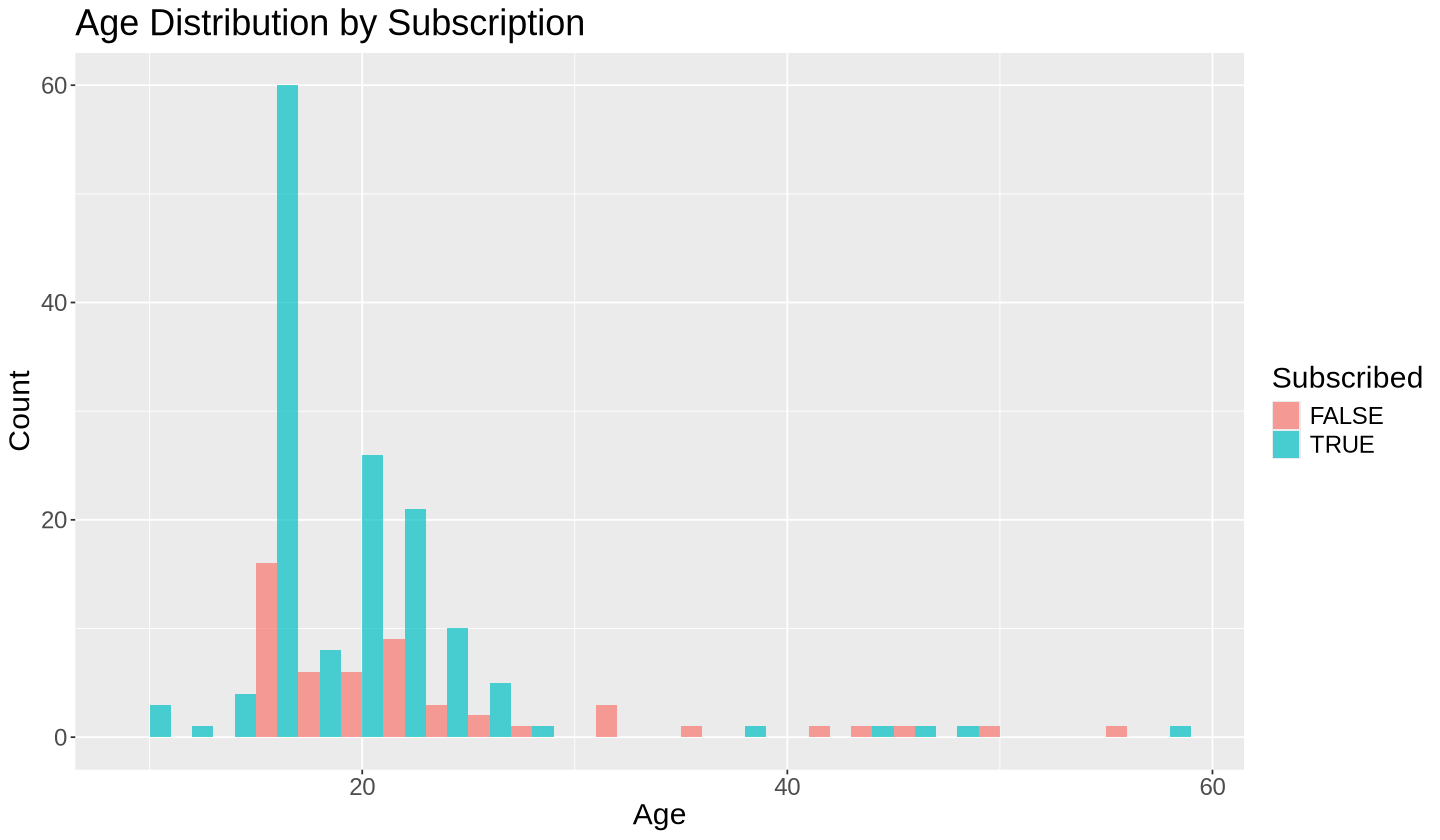

In [16]:
data |>
  ggplot(aes(x = Age, fill = subscribe)) +
  geom_histogram(position = "dodge", binwidth = 2, alpha = 0.7) +
  labs(
    title = "Age Distribution by Subscription",
    x = "Age", y = "Count",
    fill = "Subscribed"
  ) +
  theme(text = element_text(size=18))

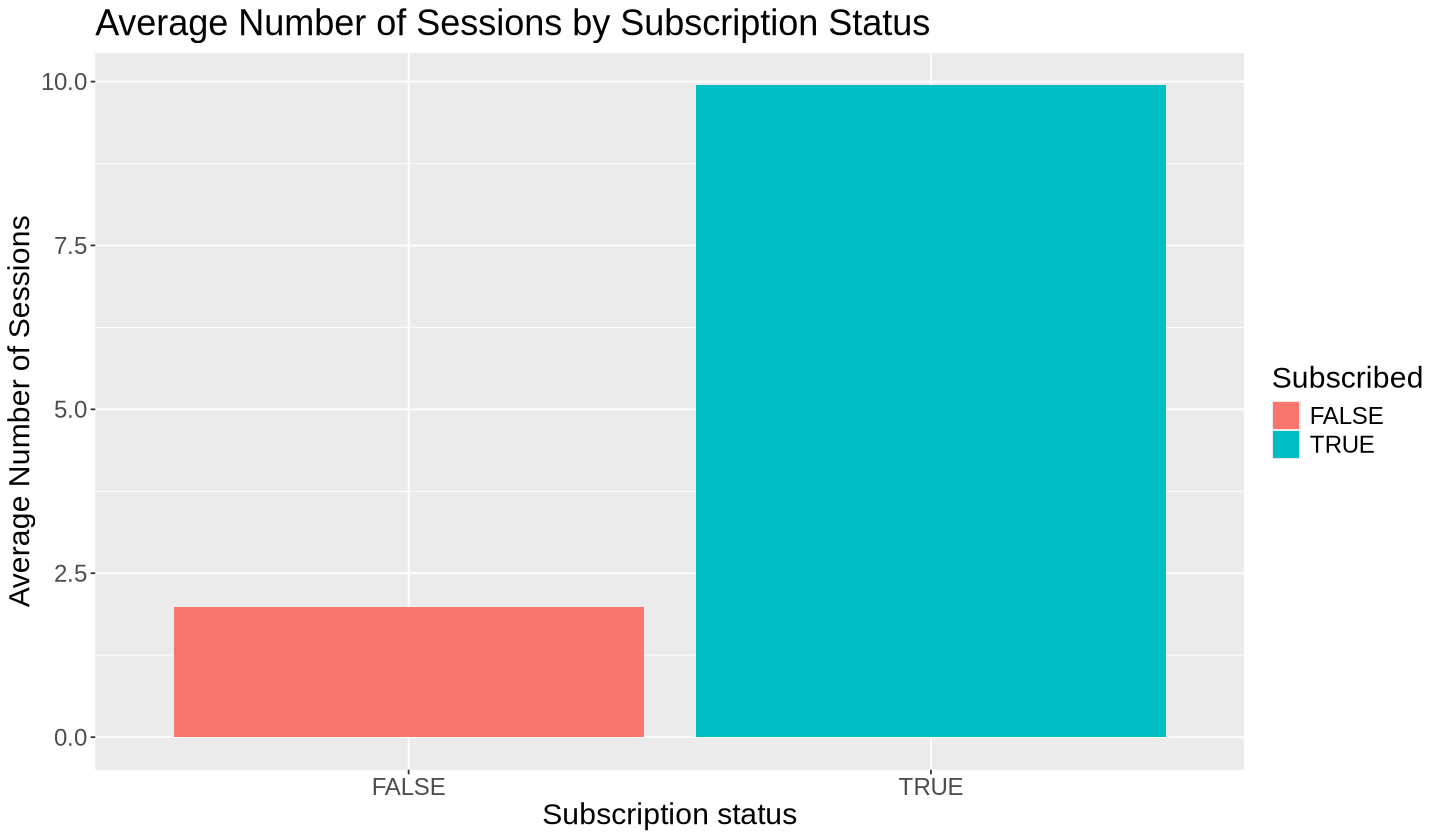

In [17]:
data |>
  group_by(subscribe) |>
  summarise(avg_sessions = mean(num_sessions)) |>
  ggplot(aes(x = subscribe, y = avg_sessions, fill = subscribe)) +
  geom_col() +
  labs(
    title = "Average Number of Sessions by Subscription Status",
    x = "Subscription status", y = "Average Number of Sessions",
    fill = "Subscribed"
  ) +
  theme(text = element_text(size=18))

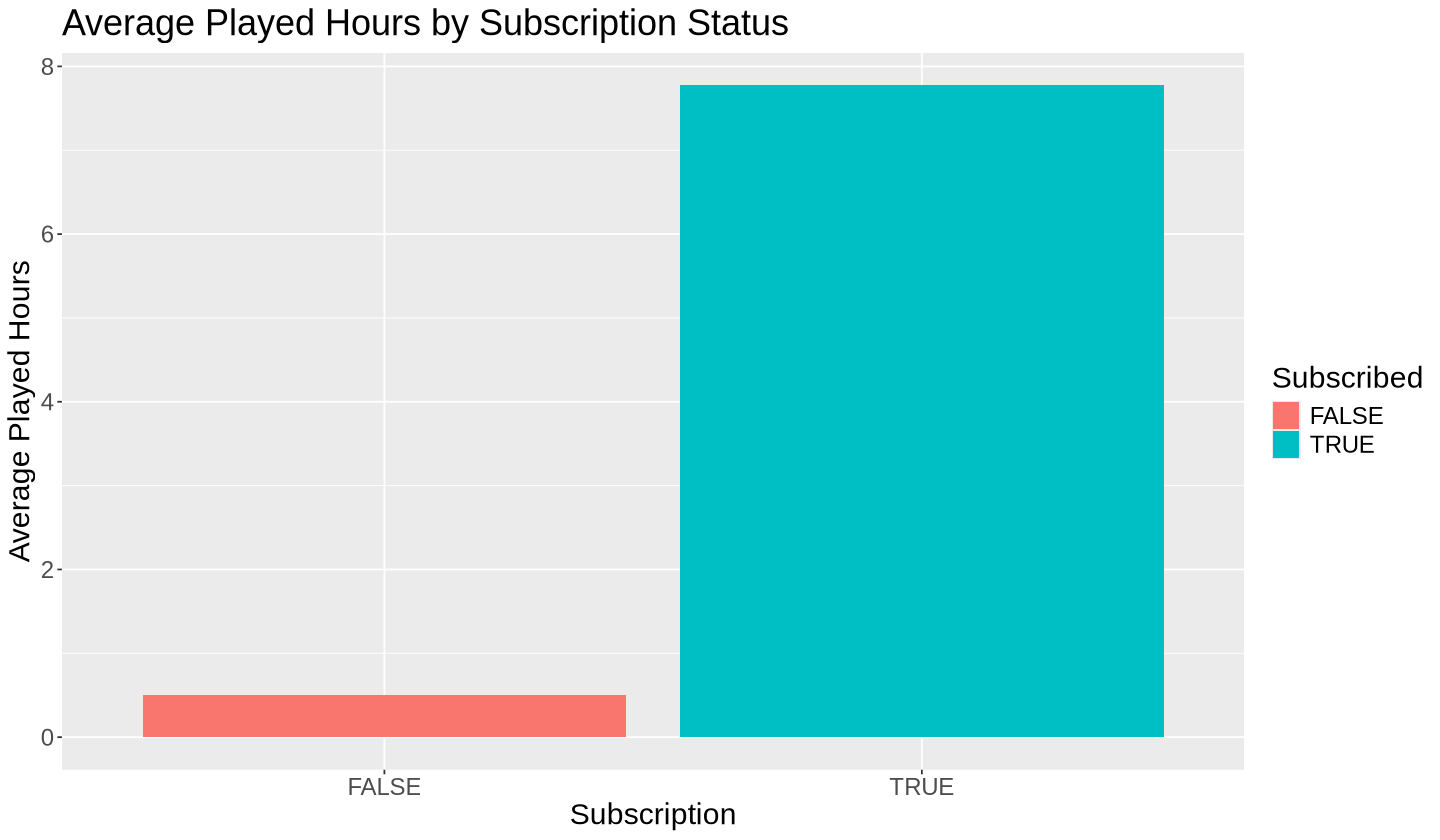

In [18]:
data |>
  group_by(subscribe) |>
  summarise(avg_played_hours = mean(played_hours, na.rm = TRUE)) |>
  ggplot(aes(x = subscribe, y = avg_played_hours, fill = subscribe)) +
  geom_col() +
  labs(
    title = "Average Played Hours by Subscription Status",
    x = "Subscription", y = "Average Played Hours",
    fill = "Subscribed"
  ) +
  theme(text = element_text(size=18))

### We note that:
 - Players with more experience (e.g., Pro, Veteran) appear more likely to subscribe.
 - On average, higher played hours, higher session time are associated with higher subscription rates.
 - Players who are closer to the age of 20 are more likely to subscribe.

These visualizations support the idea that in-game behavior and session information can predict subscription status.

## Methods and Plan

**Proposed Method**: k-Nearest Neighbors (k-NN) Classification

#### Why is this method appropriate?
- k-NN is a non-parametric method suitable for binary classification.
- Easy to implement and intuitive, especially for exploratory modeling.
- It can capture non-linear relationships without making too much assumptions about the shape of the data.

### What assumptions are required?
- Assumes similar observations (neighbors) have similar outcomes.
- Assumes numeric predictors are scaled appropriately.
- Sensitive to irrelevant features and unbalanced class distributions.

### Potential limitations:
- Sensitive to feature scaling and the choice of 'k'.
- Computationally expensive for large datasets.
- Does not handle missing data — hence we've imputed and flagged it.

### How will models be compared?
- We'll use 5-fold cross-validation on the training set.
- Model performance will be evaluated using:
    - Recall

### How will we process the data?
- Categorical predictors (`experience`, `gender`, `missing_*`) will remain as factors.
- Numeric features will be normalized using standard preprocessing steps in the recipe.
- Split data into 80% training and 20% testing.
- Use 5-fold cross-validation on the training set for model tuning and evaluation.
- Test model accuracy using testing set.